In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams['font.size'] = 20
plt.rcParams["text.usetex"] = True
plt.rcParams['hatch.linewidth'] = 4

In [3]:
def plotBeads(ax, nBeads=10, plotBeads=True, vLine=True, plotDim=1, beadColours=[]):
    nBeads = 10
    beadWidth = plotDim / nBeads
    beadRadius = beadWidth / 2
    beadCentre_x = beadRadius 
    beadCentre_y = beadRadius
    beadLinePos = []
    if plotBeads or vLine:
        for i in range(nBeads):
            try:
                beadColour = beadColours[i]
            except IndexError:
                beadColour = '#000000'
            if plotBeads:
                a_circle = plt.Circle((beadCentre_x, beadCentre_y), beadRadius, color=beadColour)
                ax.add_artist(a_circle)
            # Add vline after each bead (except last)
            if vLine and (i != nBeads - 1):
                vLine = beadCentre_x + beadRadius
                ax.axvline(beadCentre_x + beadRadius, color='r', linestyle='--', alpha=0.5)
                beadLinePos.append(vLine)
            beadCentre_x += beadWidth
    ax.set(xlim=(0, plotDim), ylim = (0, beadRadius*2))
    
    return ax, beadLinePos

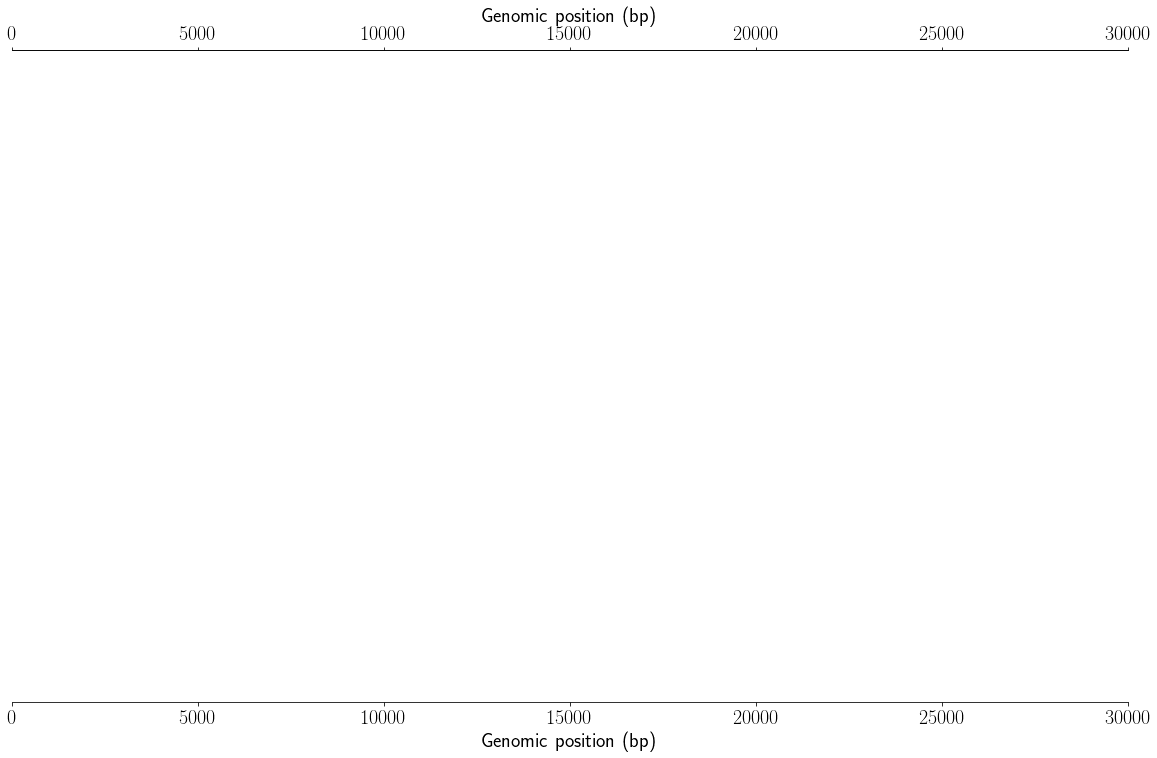

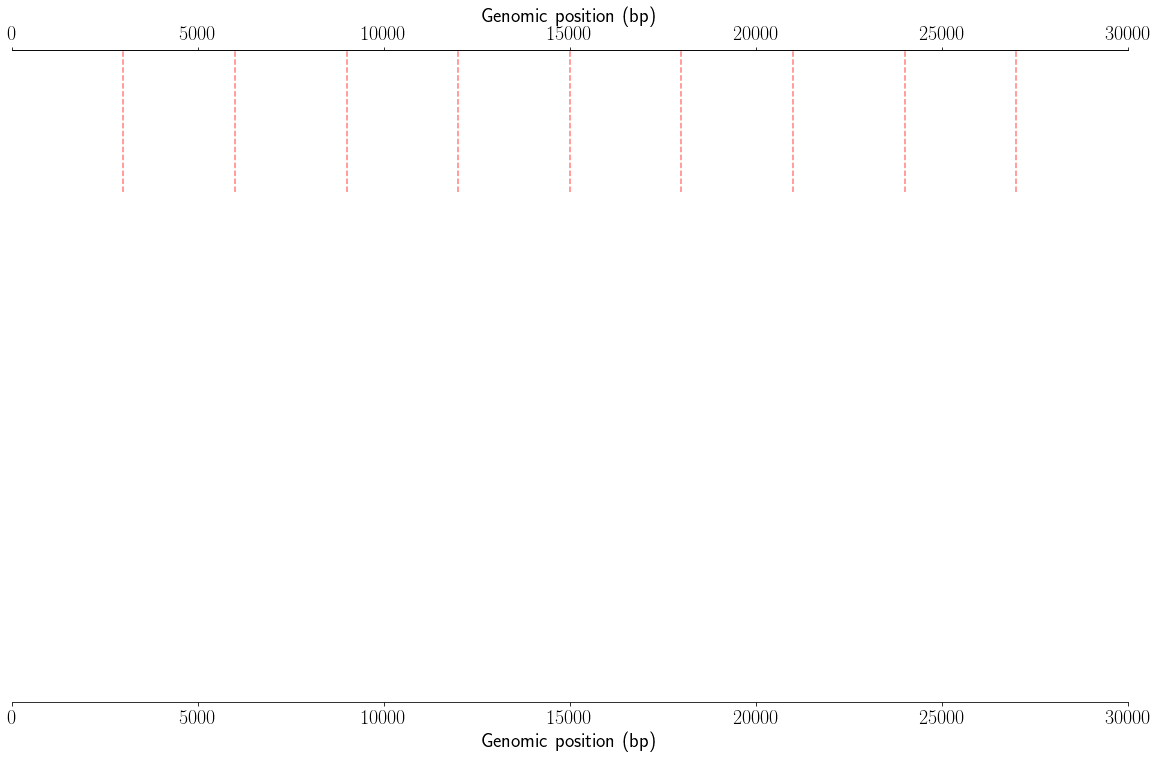

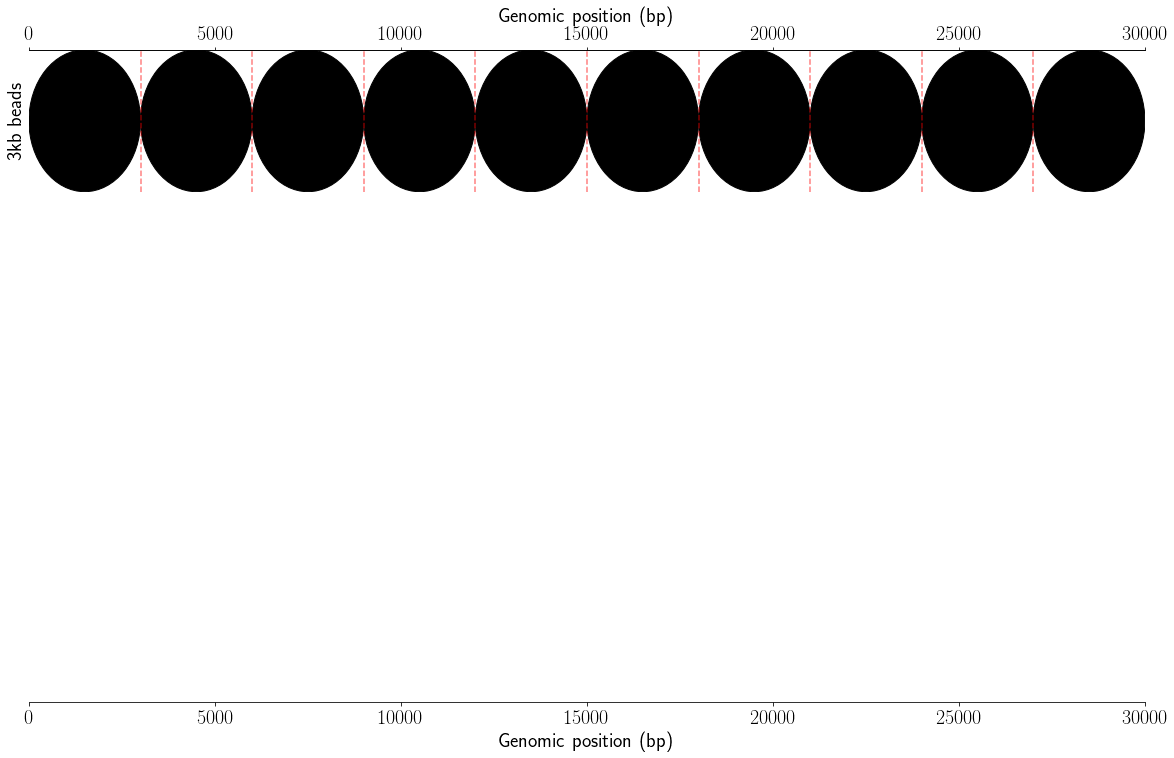

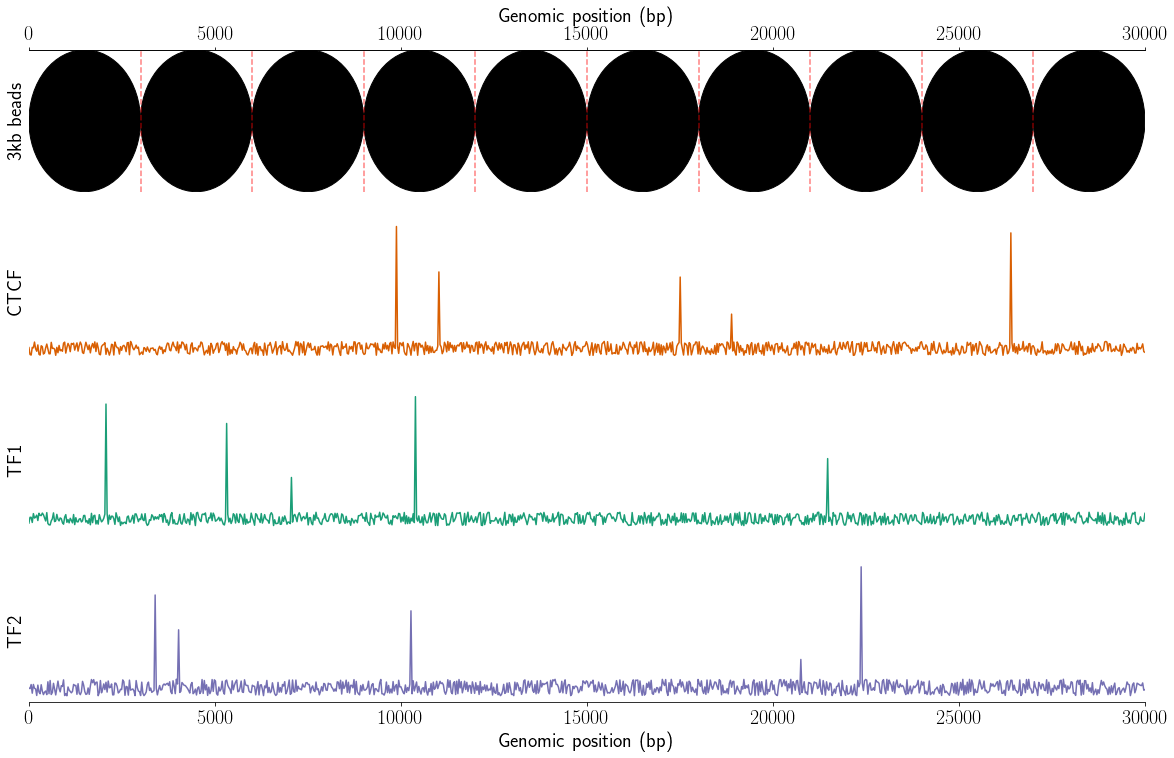

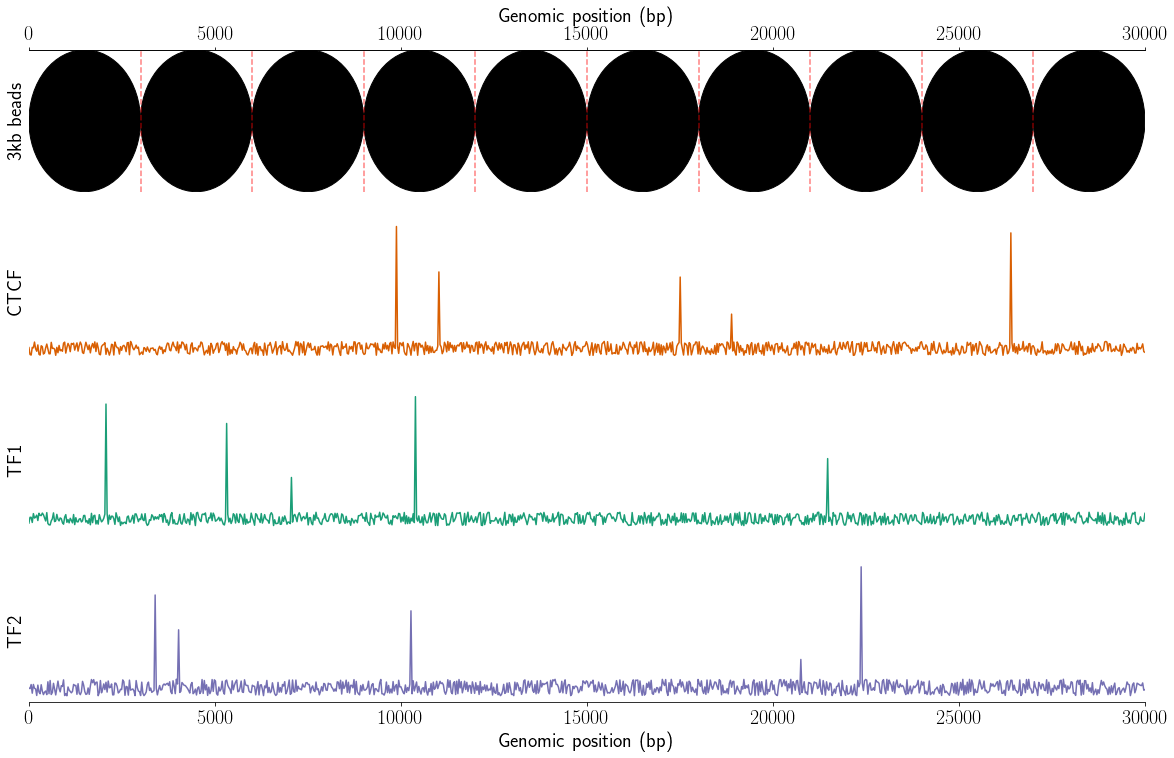

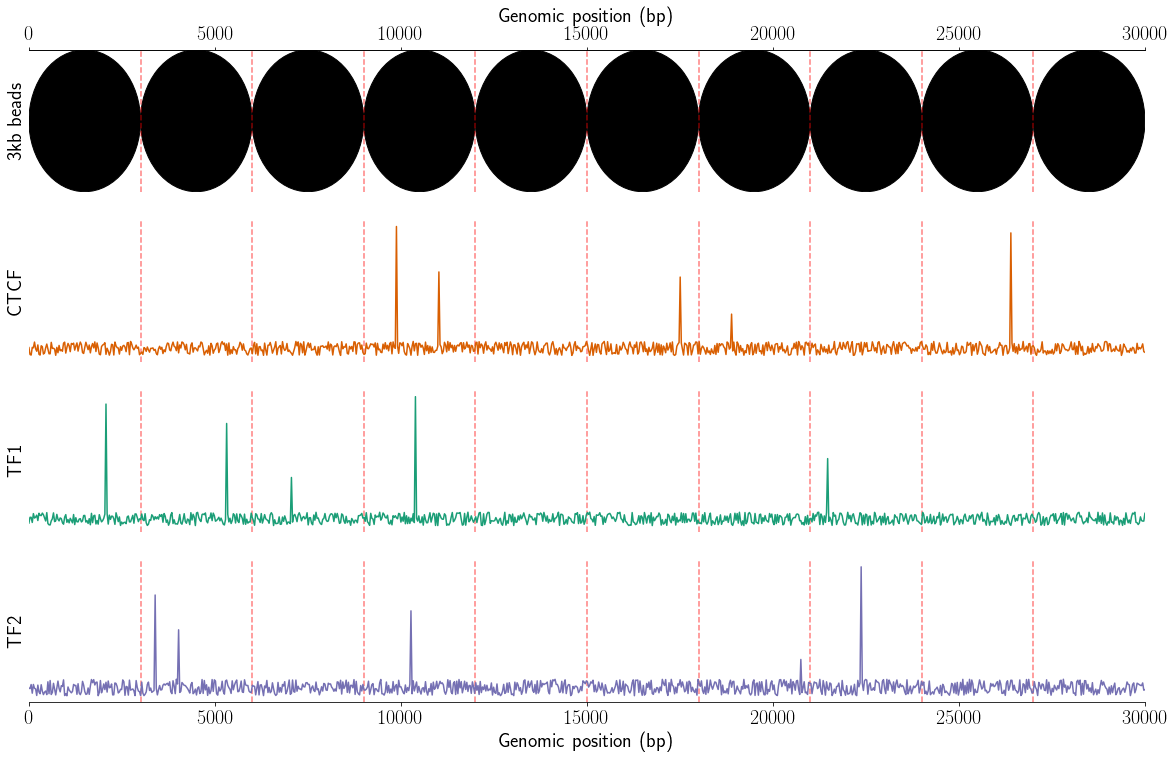

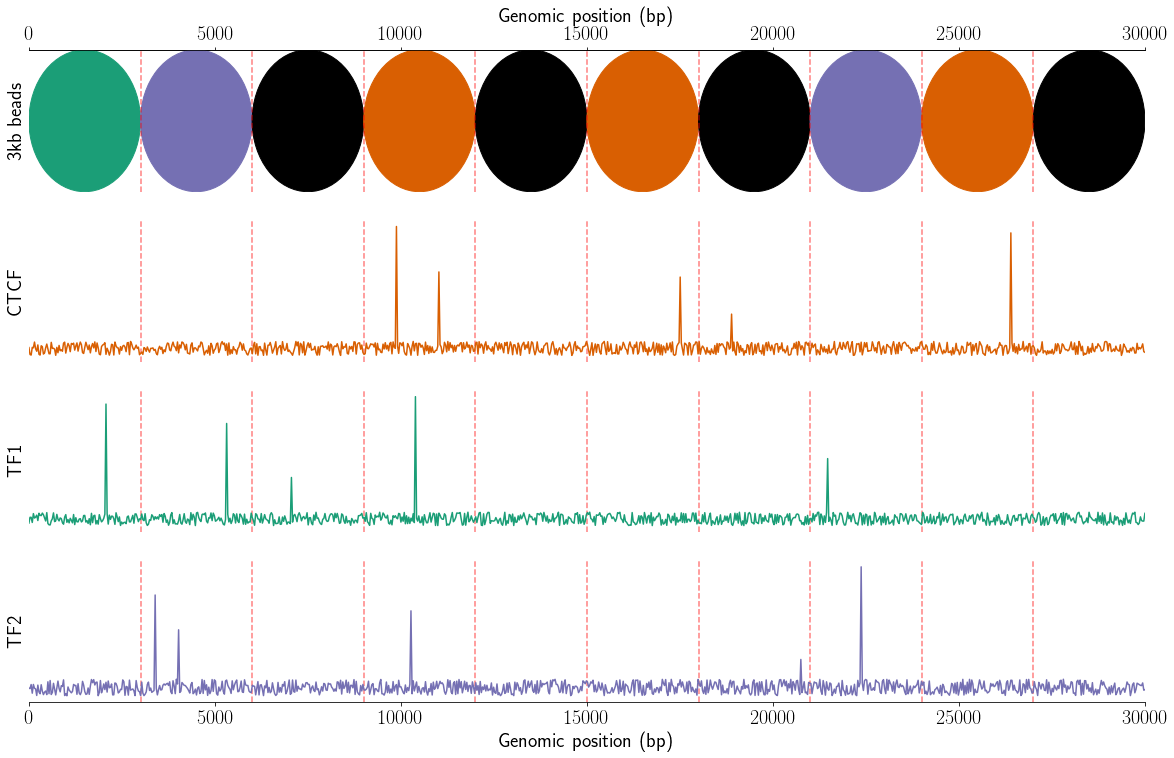

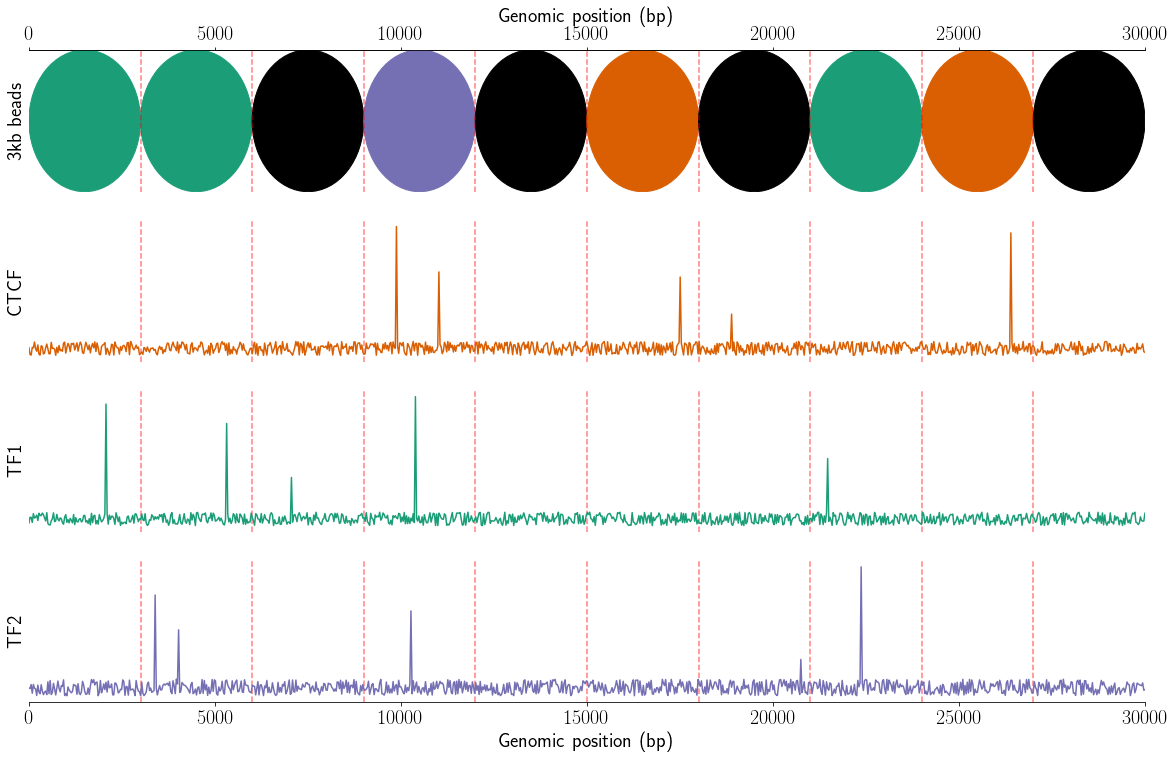

In [4]:
nBeads = 10
basesPerBead = 3000
nSamples = 1000
axisSize = basesPerBead * nBeads

# Define 3-colour colour blind friendly palette
colours = ['#d95f02', '#1b9e77', '#7570b3']
# Define y axis labels 
yLabels = [f'{int(basesPerBead/1000)}kb beads', 'CTCF', 'TF1', 'TF2']


configs = ([
    {'name': '0',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  False,
     'plotTracks': False,
     'vLineBead':  False ,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '1',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  False,
     'plotTracks': False,
     'vLineBead':  True ,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '2',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True ,
     'plotTracks': False,
     'vLineBead':  True,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '3',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True ,
     'plotTracks': True ,
     'vLineBead':  True,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '4',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True ,
     'plotTracks': True ,
     'vLineBead':  True ,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '5',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True,
     'plotTracks': True,
     'vLineBead':  True,
     'vLineTrack': True,
     'hLine':      False},
    {'name': '6',
     'beadColours' : ['#1b9e77', '#7570b3', '#000000', '#d95f02', '#000000', 
                      '#d95f02', '#000000', '#7570b3', '#d95f02', '#000000'],
     'plotBeads':  True,
     'plotTracks': True,
     'vLineBead':  True,
     'vLineTrack': True,
     'hLine':      False},
    {'name': '7',
     'beadColours' : ['#1b9e77', '#1b9e77', '#000000', '#7570b3', '#000000', 
                      '#d95f02', '#000000', '#1b9e77', '#d95f02', '#000000'],
     'plotBeads':  True,
     'plotTracks': True,
     'vLineBead':  True,
     'vLineTrack': True,
     'hLine':      False}
])

for config in configs:
    np.random.seed(510)
    fig, axes = plt.subplots(4)
    for i, ax in enumerate(axes):
        if i == 0:
            ax, beadLinePos = plotBeads(
                ax, nBeads=nBeads, vLine=config['vLineBead'], plotDim=axisSize,
                plotBeads=config['plotBeads'], beadColours=config['beadColours']) 
            if config['plotBeads']:
                ax.set_ylabel(yLabels[i])
                
        else:
            if config['plotTracks']:
                if config['hLine']:
                    ax.axhline(nSamples / 3, linestyle = '--', color='black', alpha=1)
                if config['vLineTrack']:
                    for pos in beadLinePos:
                        ax.axvline(pos, color='r', linestyle='--', alpha=0.5)
                y = np.random.rand(nSamples)
                randomPos = np.random.randint(0, nSamples, int(nBeads / 2))
                y[randomPos] *= nSamples
                # Create boolean mask to obtain all other indices
                mask = np.ones(nSamples, dtype=bool)
                mask[randomPos] = False
                y[mask] *= (nSamples / 10)
                sns.lineplot(x=np.linspace(0, axisSize, nSamples), y=y, color=colours[i-1], ax=ax)
                ax.set_ylabel(yLabels[i])
            ax.set_xlim(0, axisSize)
        # Remove all yticks and ytick labels
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_xlabel('Genomic position (bp)')

        # Add x axis to top of first plot
        if i == 0:
            secax = ax.secondary_xaxis('top')
            secax.set_xlabel('Genomic position (bp)')
        # Remove all axis spines except bottom subplot
        for spine in ['left', 'right', 'top', 'bottom']:
            if spine == 'bottom' and (i == len(axes) -1):
                continue
            elif spine == 'top' and (i == 0):
                continue
            ax.spines[spine].set_visible(False)
        if i != len(axes) - 1: 
            ax.axes.get_xaxis().set_visible(False)
        fig.savefig(f'polymerBeads-{config["name"]}.svg', dpi=300)

In [5]:
def despine(ax, xlabel=''):
    """ Remove all frame and axis values except label """
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_xlabel(xlabel)

In [6]:
def getDist(x1, x2, y1, y2, z1, z2):
    dx = (x1 - x2)**2
    dy = (y1 - y2)**2
    dz = (z1 - z2)**2
    return (dx + dy + dz)**0.5

In [7]:
def getPos(theta, k, vx=0.38):
    x = 12 * (vx + (1 - vx) * (np.cos(k * theta))**2 * np.cos(theta))
    y = 12 * (vx + (1 - vx) * (np.cos(k * theta))**2 * np.sin(theta))
    z = theta / (2 * np.pi)
    return x, y, z

In [8]:
def getEqualSpacing(nBeads, theta=0, k=4, vx=0.38, sep=1, error=0.05):
    x0, y0, z0 = getPos(theta, k, vx)
    allX = [x0]
    allY = [y0]
    allZ = [z0]
    maxSep = sep * (1 + error)
    minSep = sep * (1 - error)
    while len(allX) < nBeads:
        while True:
            theta += 0.001
            xNext, yNext, zNext = getPos(theta, k, vx)
            sep = getDist(allX[-1], xNext, allY[-1], yNext, allZ[-1], zNext)
            if (sep > minSep) and (sep < maxSep):
                allX.append(xNext)
                allY.append(yNext)
                allZ.append(zNext)
                break     
    return allX, allY, allZ

In [20]:
# Randomly select rosette length between 30kbp - 100kbp
rosette_length = random.randint(30,100) * 1000
beads_per_loop = rosette_length / basesPerBead
# Randomly select number of loops per turn between 4 and 12
loops_per_turn = random.randint(4,12)
beads_per_turn = beads_per_loop * loops_per_turn
n_turns = nBeads / beads_per_turn
k = loops_per_turn / 2
nBeads = 1000
length = nBeads * basesPerBead
vx = 0.38
theta = 0
sep = 1
x, y, z = getEqualSpacing(nBeads, theta, k, vx, sep, error=0.05)

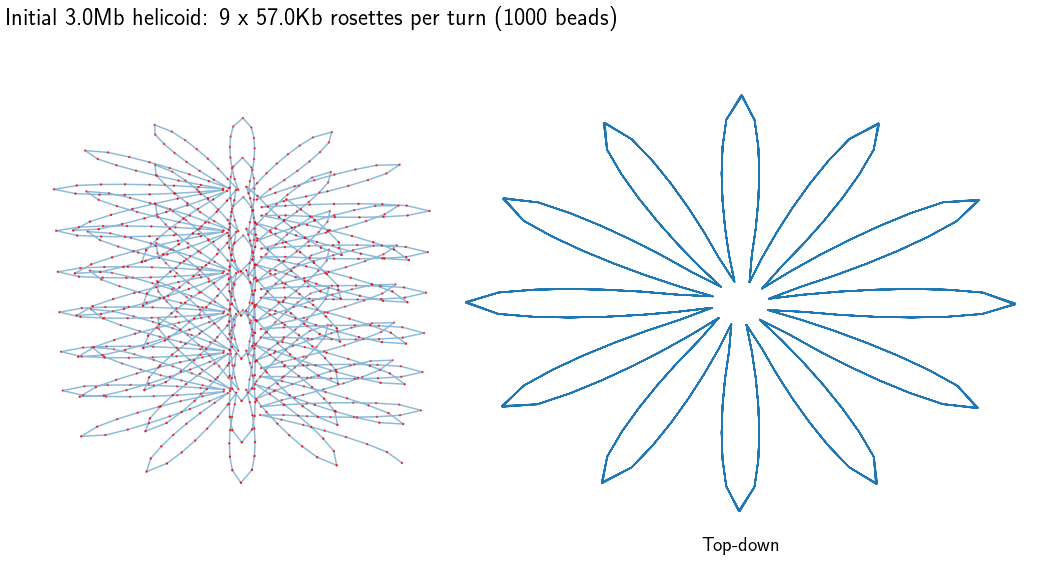

In [24]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.dist = 7
ax.axis("off")
ax.plot(x, y, z, linestyle='-', alpha=0.5)
ax.scatter(x, y, z, color='r', s=2)
plt.title(f'Initial {length // 1e6}Mb helicoid: 9 x {rosette_length // 1e3}Kb rosettes per turn ({nBeads} beads)', pad=50, loc='left')
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y)
despine(ax, xlabel='Top-down')

fig.tight_layout(w_pad=-5)
fig.savefig('initialConformation.svg', dpi=300)

In [25]:
def addCohesin(ax, beadRadius, beadID1, beadID2, alpha=1.0, 
               color='#000000', lw=4, ls='--'):
    bead1Coords = getBeadCoords(beadID1, beadRadius)
    bead2Coords = getBeadCoords(beadID2, beadRadius)
    ax.plot(
        [bead1Coords['x'], bead2Coords['x']],
        [bead1Coords['y'], bead2Coords['y']],
        ls=ls, lw=lw, c=color, alpha=alpha)
    return ax

In [26]:
def getBeadCoords(bead, beadRadius):
    x = beadRadius + (beadRadius * 2 * bead)
    y = 2 * np.sin(x)
    return {'x': x, 'y': y}

In [28]:
def stage1(ax, beadRadius):
    # Initial cohesin attachment
    ax = addCohesin(ax, beadRadius, 9, 11, alpha=0.25)
    ax.arrow(9, 2.2, -0.9, -0.64, head_width=0.1, fc='k', ec='k', alpha=0.5)
    ax.text(9.1, 2.2, 'P(attachment)')
    return ax

In [29]:
def stage2(ax, beadRadius):
    # Cohesin advancement
    ax.arrow(7.8, 1.3, 0.1, -0.9, head_width=0.1, fc='k', ec='k', alpha=0.5)
    ax = addCohesin(ax, beadRadius, 9, 11)
    ax = addCohesin(ax, beadRadius, 8, 12, alpha=0.25)
    ax.text(8.1, 0.6, 'P(extrusion)')
    return ax

In [30]:
def stage3(ax, beadRadius):
    # Cohesin detachment
    ax.arrow(7.8, 1.3, -1.5, -0.45, head_width=0.1, fc='k', ec='k', alpha=0.5)
    ax.text(4.4, 1.1, 'P(detachment)')
    ax.scatter([5.8], [0.8], s=800, c='red', marker='x')
    return ax

In [31]:
def stage4(ax, beadRadius):
    # No extrusion pass CTCF
    ax = addCohesin(ax, beadRadius, 6, 14, alpha=1)
    ax.text(7, -2.4, 'P(extrusion) = 0')
    #ax.arrow(7.6, -2.0, 0, -1.4, head_width=0.1, fc='k', ec='k', alpha=0.5)
    return ax

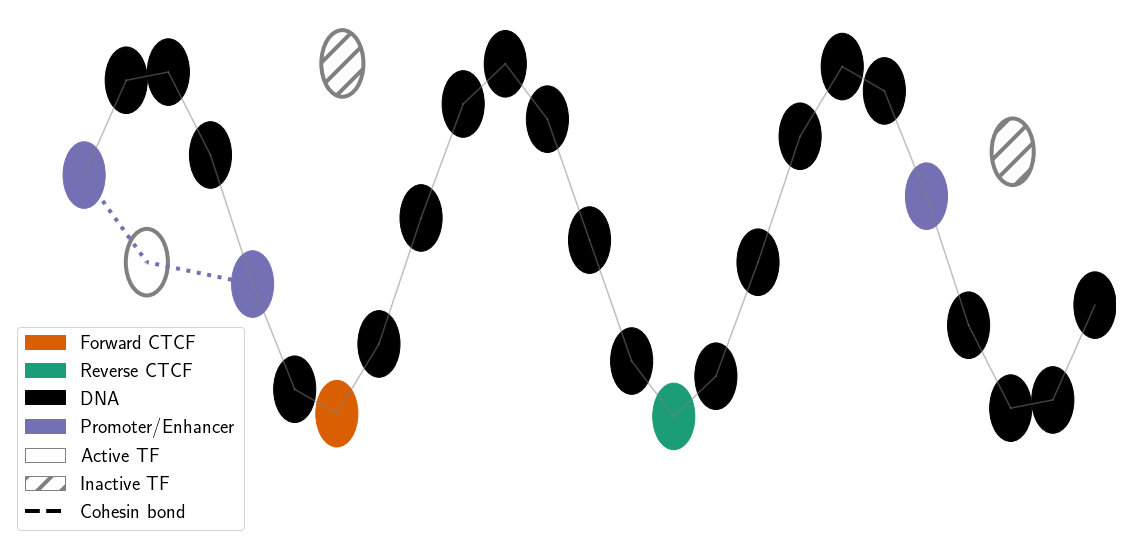

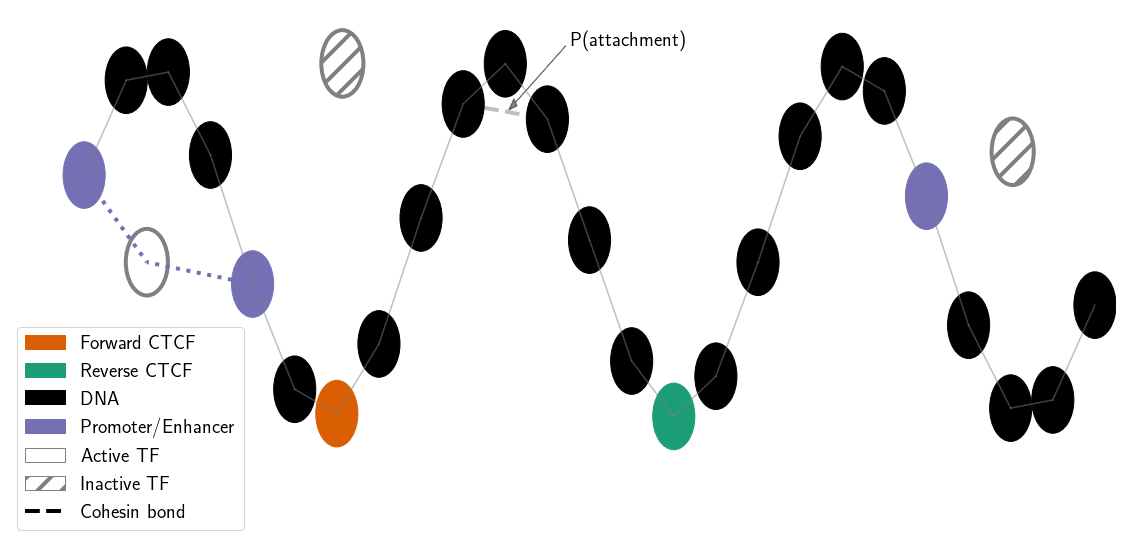

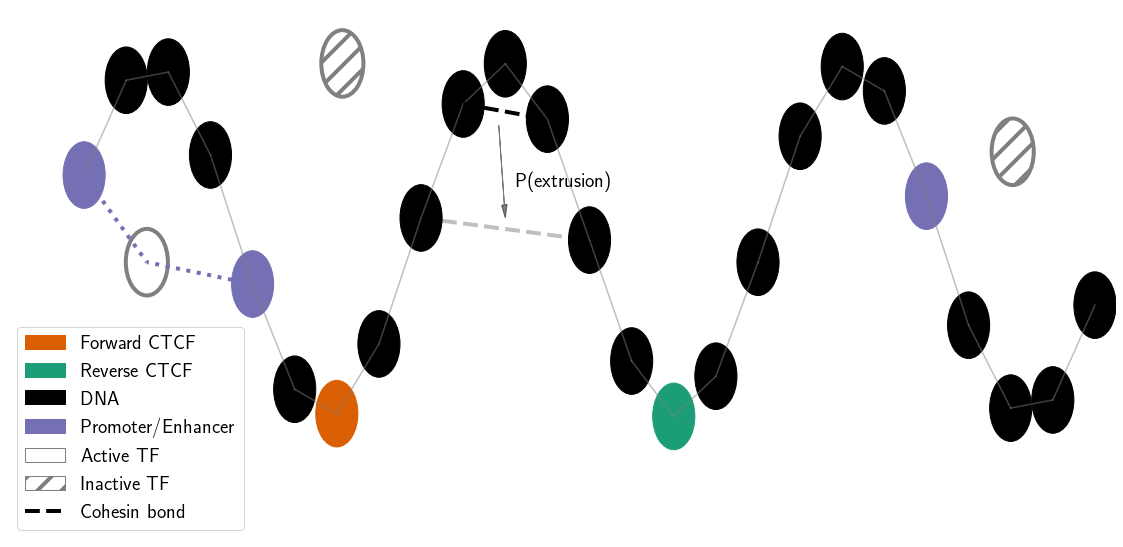

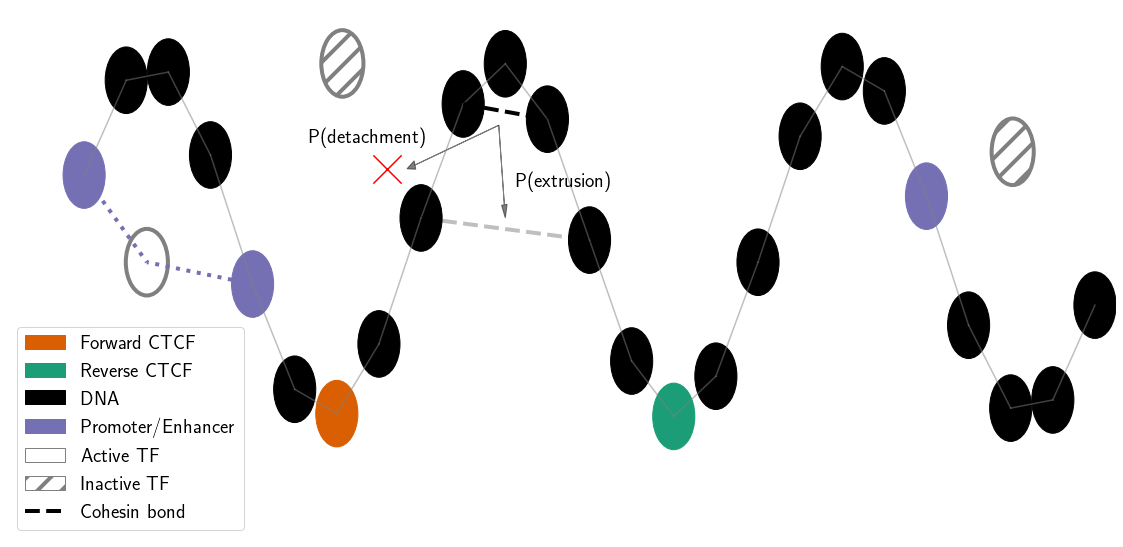

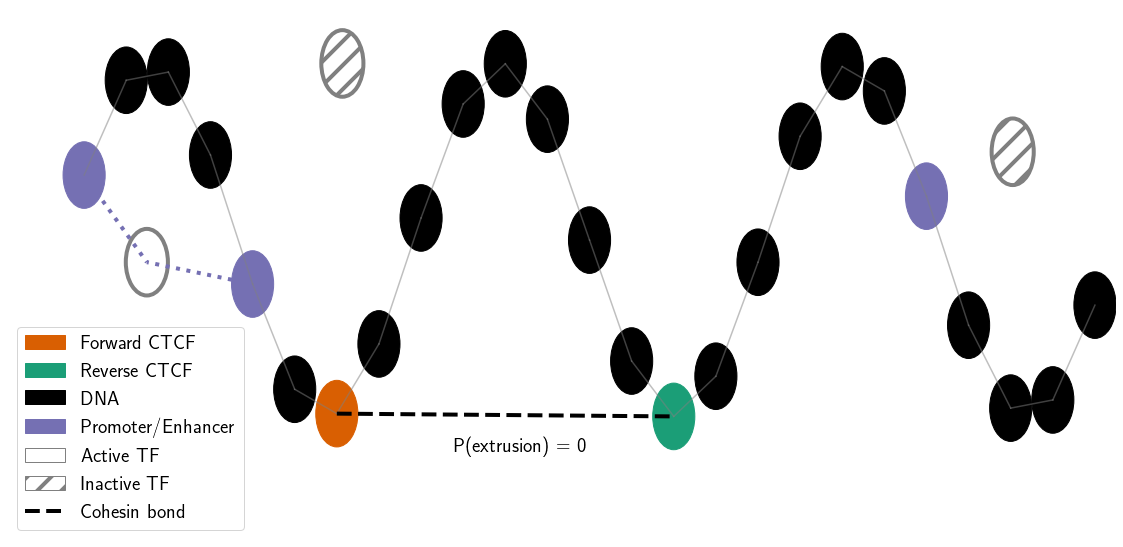

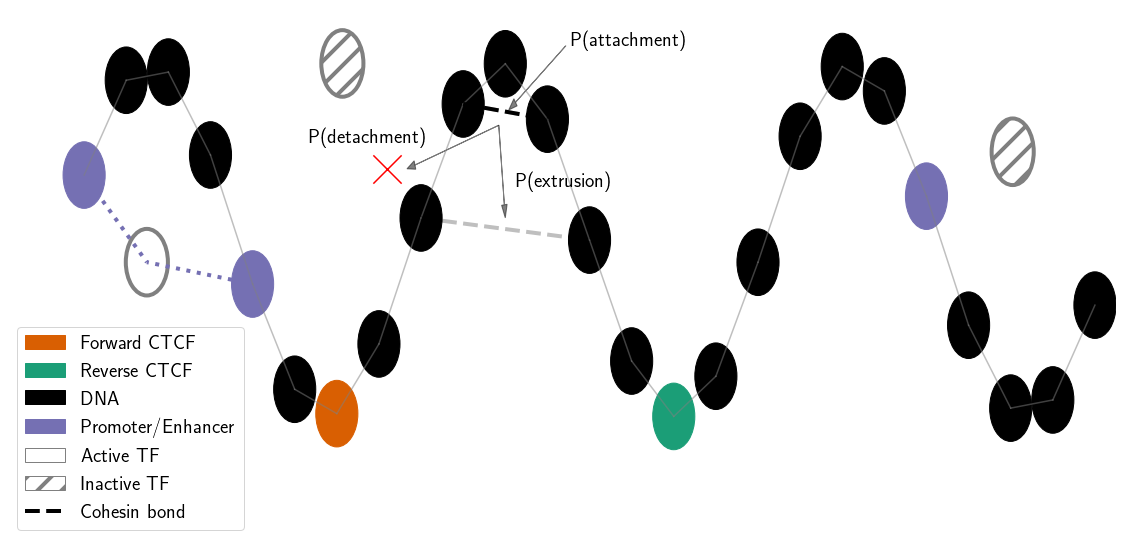

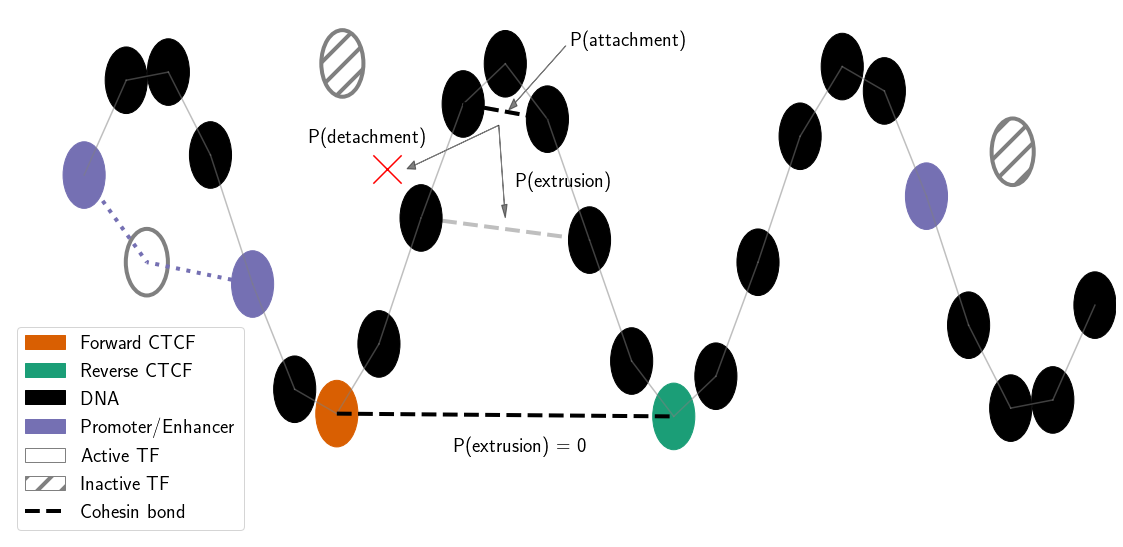

In [34]:
nBeads = 25
totalLength = 6 * np.pi
basesPerBead = totalLength / nBeads
beadRadius = basesPerBead / 2


beadCentre_x = beadRadius
beadCentre_y = beadRadius
random.seed(808)
colours = ['#d95f02', '#1b9e77', '000000']
coords = {'x':      [beadRadius],
          'y':      [beadRadius],
          'colour': ['000000'] * nBeads}
coords['colour'][0]  = '#7570b3'
coords['colour'][4]  = '#7570b3'
coords['colour'][6]  = '#d95f02'
coords['colour'][14] = '#1b9e77'
coords['colour'][20]  = '#7570b3'

TFcoords = [{'coords': (1.5, -0.25), 'colour': 'gray', 'hatch': None},
            {'coords': (5,    2.0), 'colour': 'gray', 'hatch': '/'},
            {'coords': (17, 1.0), 'colour': 'gray', 'hatch': '/'}]

for stage in range(7):
    fig, ax = plt.subplots(figsize=plt.figaspect(0.5))    
    ax.plot([getBeadCoords(0, beadRadius)['x'], 1.5],
            [getBeadCoords(0, beadRadius)['y'], -0.25],
            ls='dotted', lw=4, c='#7570b3')
    ax.plot([getBeadCoords(4, beadRadius)['x'], 1.5],
            [getBeadCoords(4, beadRadius)['y'], -0.25],
            ls='dotted', lw=4, c='#7570b3')
    for TF in TFcoords:
        a_circle = plt.Circle(TF['coords'], beadRadius, color=TF['colour'], fill=None, hatch=TF['hatch'], lw=4, alpha=1)
        ax.add_artist(a_circle)
    for bead in range(nBeads):
        beadCoords = getBeadCoords(bead, beadRadius)
        prevBeadCoords = getBeadCoords(bead - 1, beadRadius)
        if bead != 0:
            ax.plot([prevBeadCoords['x'], beadCoords['x']], 
                    [prevBeadCoords['y'], beadCoords['y']],
                    color='grey', linestyle='-', alpha=0.5)
        a_circle = plt.Circle(
            (beadCoords['x'], beadCoords['y']), 
            beadRadius, color=coords['colour'][bead])
        ax.add_artist(a_circle)

    ax.set(xlim=(-1, totalLength), ylim = (-beadRadius*9, beadRadius*7))

    customLegend = [plt.Circle([0], [0], color=colours[0]),
                    plt.Circle([0], [0], color=colours[1]),
                    plt.Circle([0], [0], color=colours[2]),
                    plt.Circle([0], [0], color='#7570b3'),
                    plt.Circle([0], [0], edgecolor='gray', facecolor='white', hatch=None),
                    plt.Circle([0], [0], edgecolor='gray', facecolor='white', hatch='/'),
                    plt.Line2D([0], [0], color='#000000', lw=4, linestyle='--')]
    ax.legend(
        customLegend,
        ['Forward CTCF', 'Reverse CTCF', 'DNA', 'Promoter/Enhancer', 'Active TF', 'Inactive TF', 'Cohesin bond'],
        loc='lower left')


    if stage == 1:  
        ax = stage1(ax, beadRadius)
    if (stage == 2) or (stage == 3):
        ax = stage2(ax, beadRadius)
    if stage == 3:
        ax = stage3(ax, beadRadius)
    elif stage == 4:
        ax = stage4(ax, beadRadius)
    elif stage == 5:
        ax = stage1(ax, beadRadius)
        ax = stage2(ax, beadRadius)
        ax = stage3(ax, beadRadius)
    elif stage == 6:
        ax = stage1(ax, beadRadius)
        ax = stage2(ax, beadRadius)
        ax = stage3(ax, beadRadius)
        ax = stage4(ax, beadRadius)
        
    ax.axis("off")
    fig.tight_layout()
    fig.savefig(f'cohesinExtrusion-{stage}.svg', dpi=300)